In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
## checking missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
## can add if big data set is there 
df["Car_Name"].nunique()

98

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
## ignoring Carname column
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
final_dataset["Current_Year"] = 2022

In [14]:
final_dataset["no_year"] = final_dataset["Current_Year"] - final_dataset["Year"]

In [15]:
final_dataset.drop(["Year","Current_Year"],inplace=True,axis=1)

In [16]:
# get one hot encoding and drop original columns
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [18]:
## Performing EDA on data

final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [19]:
##
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<AxesSubplot:>

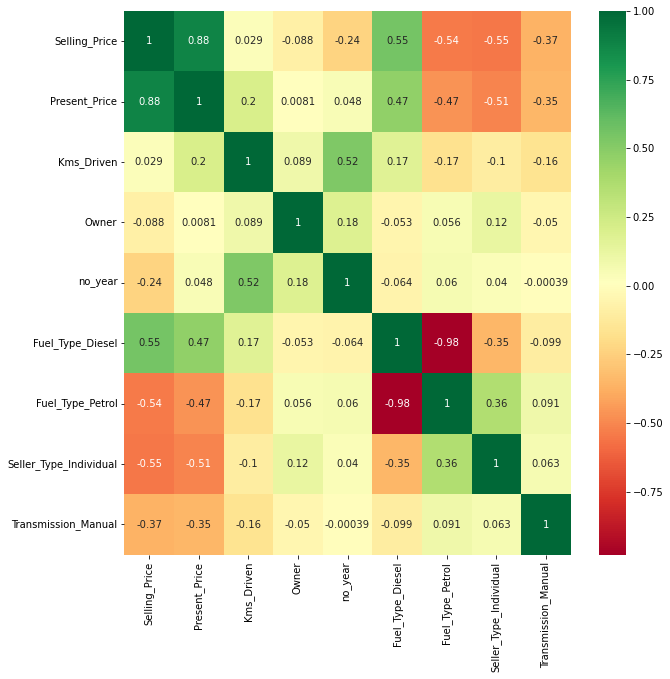

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(final_dataset.corr(),annot=True,cmap="RdYlGn")


In [21]:
#indepedent and dependent features
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [22]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [23]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [24]:
### Feature  Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.35860596 0.04201982 0.0004299  0.07571105 0.24078204 0.00771071
 0.13176452 0.14297601]


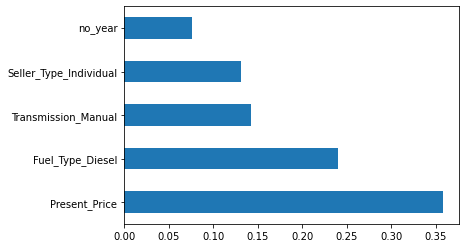

In [26]:
## plot graph of feature importances for better visualization

feat_imp = pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [28]:
X_train.shape

(240, 8)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [30]:
### Hyper-parameters
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [31]:
## Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

# Number of Features to consider at every split
max_features = ['auto','sqrt']

# Maximum numbers of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

# Minimum no. of samples required to split the node
min_samples_split = [2,5,10,15,100]

# Minimum no. of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
# Create the random grid
random_grid = {'n_estimators':n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
# Use the random grid to search for best hyperparameters

rf = RandomForestRegressor()

In [35]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                               scoring='neg_mean_squared_error',
                              n_iter= 10, cv=5,verbose=2,random_state= 42,n_jobs=-1)

In [36]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [37]:
predictions = rf_random.predict(X_test)

In [38]:
predictions

array([ 5.78817306,  4.11658218,  1.20510902,  2.74157851,  7.90755751,
        6.86497029,  4.10873631, 11.85161544,  7.52683137,  3.0094704 ,
        2.86732688,  0.33261318,  6.51730326,  6.69800133,  1.31805836,
        1.20637724,  5.33271391,  8.20439269, 10.70632793,  4.14287835,
        0.6916032 , 10.18028399,  0.29776898,  4.90156121,  0.2018633 ,
        2.57196936, 20.8670122 ,  4.93426568,  0.54347336,  2.80788231,
        4.50795658,  2.96481535, 14.26572171,  1.21733824,  5.2979713 ,
        0.91103293,  0.70620469,  8.32059075,  0.61669583,  0.5167886 ,
        0.50360355,  0.44338975,  1.23828882,  0.99740539,  2.53874884,
        7.46468253,  7.24670964, 21.46158168,  0.47850925, 17.4656182 ,
        3.76045651,  4.98675656,  1.16080784,  2.9716097 , 10.71332885,
        3.22408564,  0.44869776,  3.81267247,  5.32947544,  9.90904781,
        6.17329916])

C:\Users\haris\anaconda3\envs\cardekho_prediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

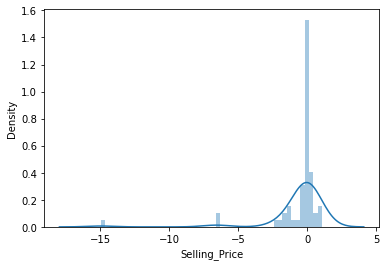

In [39]:
## Distribution of errors
sns.distplot(y_test-predictions)

## errors following normal distribution, hence giving good predictions

[[1.        0.8812422]
 [0.8812422 1.       ]]


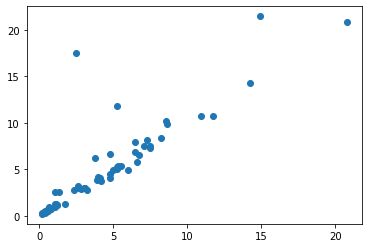

In [40]:
plt.scatter(y_test,predictions)
print(np.corrcoef(y_test,predictions))

In [41]:
## store the bulit model
import pickle
#open file where you want to store data
file = open('Cardekho_rf_prediction_model.pkl','wb')

# write info to file
pickle.dump(rf_random,file)
file.close()